<a href="https://colab.research.google.com/github/ualahari/aimltask-8/blob/main/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📤 Please upload your Kaggle dataset (CSV)...


Saving Mall_Customers.csv to Mall_Customers.csv
✅ Dataset Loaded: Mall_Customers.csv
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


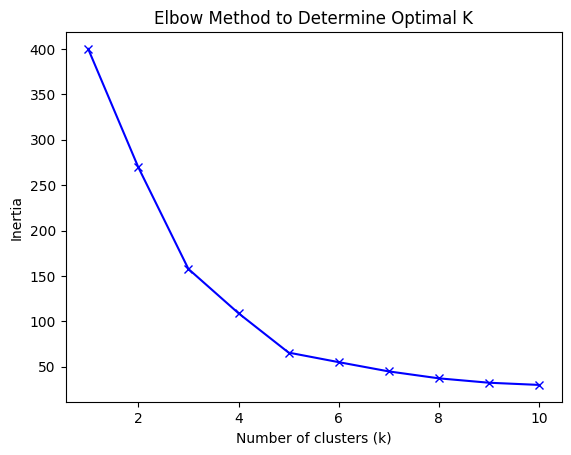

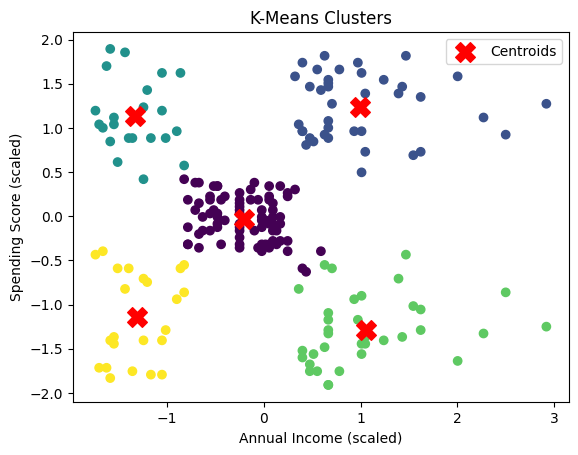

📊 Silhouette Score: 0.5546571631111091
✅ Clustered dataset saved as: clustered_dataset.csv


In [2]:
# 📌 Task 8: K-Means Clustering with Kaggle Dataset

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from google.colab import files

# Step 2: Upload Dataset (Kaggle CSV)
print("📤 Please upload your Kaggle dataset (CSV)...")
uploaded = files.upload()

# Load the uploaded file
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
print("✅ Dataset Loaded:", filename)

# Preview
print(data.head())

# Step 3: Select Features (you can adjust columns based on dataset)
# Example for Mall Customers dataset
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Elbow Method to find optimal K
inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

# Step 5: Train Final KMeans (e.g., k=5 based on elbow)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

data['Cluster'] = labels

# Step 6: Visualize Clusters
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label="Centroids")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("K-Means Clusters")
plt.legend()
plt.show()

# Step 7: Evaluate Clustering
sil_score = silhouette_score(X_scaled, labels)
print("📊 Silhouette Score:", sil_score)

# Step 8: Save clustered dataset
output_file = "clustered_dataset.csv"
data.to_csv(output_file, index=False)
print("✅ Clustered dataset saved as:", output_file)
